Epoch 1/100
718/718 [==============================] - 106s 142ms/step - loss: 1.7959 - accuracy: 0.2622 - val_loss: 1.7262 - val_accuracy: 0.3112
Epoch 2/100
718/718 [==============================] - 103s 143ms/step - loss: 1.7243 - accuracy: 0.3100 - val_loss: 1.7029 - val_accuracy: 0.3154
Epoch 3/100
718/718 [==============================] - 101s 140ms/step - loss: 1.6686 - accuracy: 0.3418 - val_loss: 1.6164 - val_accuracy: 0.3652
Epoch 4/100
718/718 [==============================] - 100s 139ms/step - loss: 1.6230 - accuracy: 0.3623 - val_loss: 1.5970 - val_accuracy: 0.3769
Epoch 5/100
718/718 [==============================] - 100s 140ms/step - loss: 1.5826 - accuracy: 0.3824 - val_loss: 1.5703 - val_accuracy: 0.3898
Epoch 6/100
718/718 [==============================] - 100s 139ms/step - loss: 1.5393 - accuracy: 0.3982 - val_loss: 1.5373 - val_accuracy: 0.4063
Epoch 7/100
718/718 [==============================] - 100s 139ms/step - loss: 1.4954 - accuracy: 0.4191 - val_loss: 1

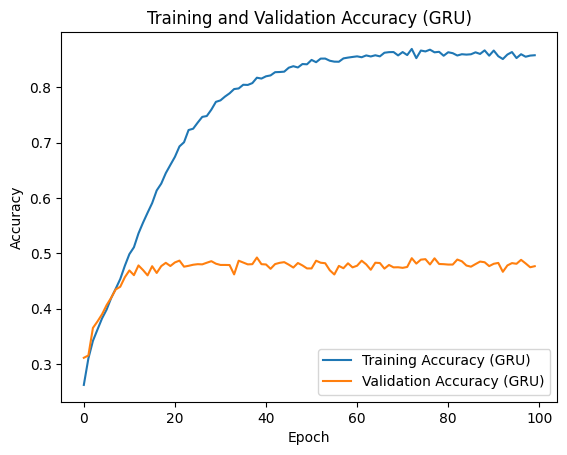

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Function to load and preprocess images
def load_and_preprocess_data(directory):
    images = []
    labels = []
    emotion_labels = os.listdir(directory)

    for label, emotion in enumerate(emotion_labels):
        emotion_dir = os.path.join(directory, emotion)
        for img_name in os.listdir(emotion_dir):
            img_path = os.path.join(emotion_dir, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = cv2.resize(img, (48, 48))  # Resize images to a common size
            images.append(img)  # Do not flatten the image for RNN
            labels.append(label)

    return np.array(images), np.array(labels)

# Load and preprocess the data
root_dir ='/kaggle/input/emotion-detection-fer/'
train_dir = os.path.join(root_dir, 'train')
test_dir = os.path.join(root_dir, 'test')

X_train, y_train = load_and_preprocess_data(train_dir)
X_test, y_test = load_and_preprocess_data(test_dir)

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels
num_classes = len(os.listdir(train_dir))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Reshape data for GRU
X_train_gru = X_train.reshape(X_train.shape[0], 48, 48)
X_test_gru = X_test.reshape(X_test.shape[0], 48, 48)

# Split the training data into training and validation sets
X_train_gru, X_val_gru, y_train_gru, y_val_gru = train_test_split(X_train_gru, y_train, test_size=0.2, random_state=42)

# Define the GRU model
model_gru = Sequential()
model_gru.add(GRU(256, input_shape=(48, 48), return_sequences=True))
model_gru.add(Dropout(0.5))
model_gru.add(GRU(128))
model_gru.add(Dropout(0.5))
model_gru.add(Dense(num_classes, activation='softmax'))

# Compile the GRU model
model_gru.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the GRU model
history_gru = model_gru.fit(X_train_gru, y_train_gru, epochs=100, batch_size=32, validation_data=(X_val_gru, y_val_gru))

# Evaluate the GRU model on the test set
test_loss_gru, test_accuracy_gru = model_gru.evaluate(X_test_gru, y_test)
print(f'Test Accuracy (GRU): {test_accuracy_gru}')

# Visualize GRU training history
plt.plot(history_gru.history['accuracy'], label='Training Accuracy (GRU)')
plt.plot(history_gru.history['val_accuracy'], label='Validation Accuracy (GRU)')
plt.title('Training and Validation Accuracy (GRU)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [2]:
model_gru.save('GRU.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
